In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dynasor import read_sample_from_npz
from dynasor.post_processing import XRayFormFactors
from dynasor.post_processing import get_weighted_sample
import mplpub
mplpub.setup(template='acs')

/Users/prakriti/miniconda3/envs/nep2/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


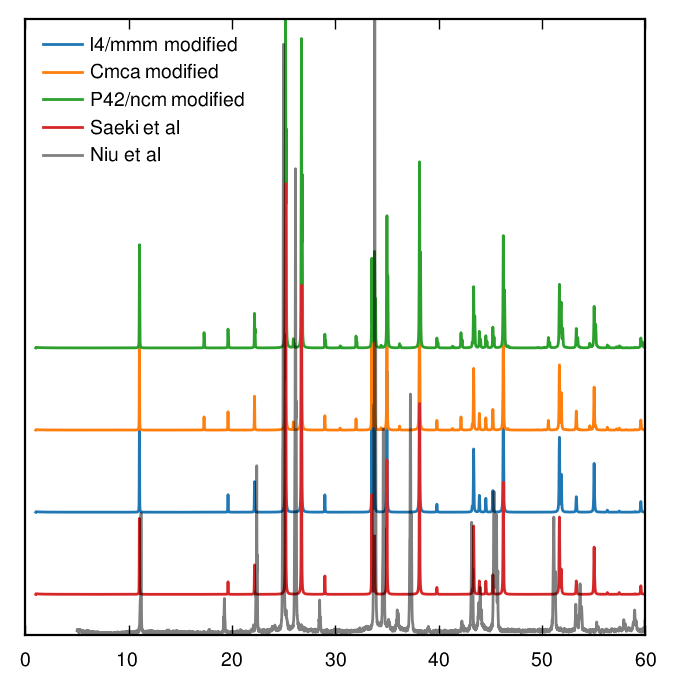

In [2]:
df_exp_214 = pd.read_csv('data/exp_n1.csv')
data = pd.read_csv('data/EntryWithCollCode80651.csv')
data2 = pd.read_csv('data/RP_1_I4_mmm_modified.csv')
data3 = pd.read_csv('data/RP_1_Cmca_modified.csv')
data4 = pd.read_csv('data/RP_1_P42_ncm_modified.csv')
fig, (ax) = plt.subplots(1,1, figsize=(4,4), dpi=200, sharex=True)
ax.plot(data2['theta'], data2['int']+30, label = 'I4/mmm modified')
ax.plot(data3['theta'], data3['int']+50, label = 'Cmca modified')
ax.plot(data4['theta'], data4['int']+70, label = 'P42/ncm modified')
ax.plot(data['theta'], data['int']+10, label = 'Saeki et al')
ax.plot(df_exp_214['Angle'], df_exp_214['PSD']*0.03, color = 'k',alpha = 0.5, label = 'Niu et al')
ax.set_yticklabels([])
ax.set_yticks([])
ax.set_xlim([0,60])
ax.set_ylim([0,150])
ax.legend()
plt.savefig('figs/XRD_exp_n1.png')

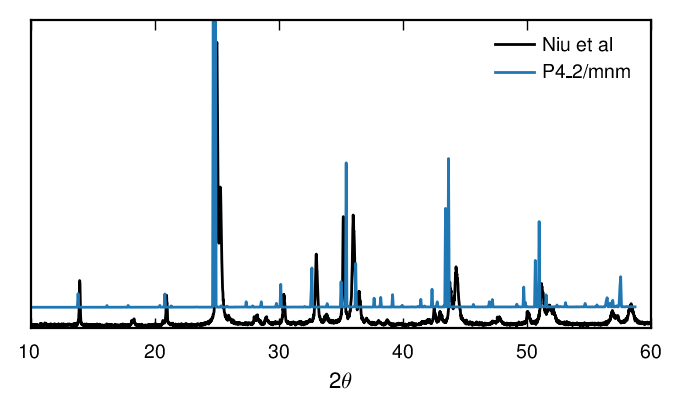

In [3]:
df_exp_327 = pd.read_csv('data/exp_n2.csv')
n=1
lam = 1.5406
temp = 300
data_dict_qwidths_2 = dict()
sample_averaged_n2 = read_sample_from_npz('data/n2.npz')
xrff = XRayFormFactors(sample_averaged_n2.atom_types)
sample_weighted_n2 = get_weighted_sample(sample_averaged_n2, xrff)
theta_2 = np.arcsin(n * sample_averaged_n2.q_norms * lam / 4 / np.pi) * 180 / np.pi
data_dict_qwidths_2[temp] = sample_weighted_n2.q_norms, sample_weighted_n2.Sq

fig, (ax) = plt.subplots(1,1, figsize=(4,2), dpi=200)
ax.plot(df_exp_327['Angle'], df_exp_327['PSD'], color = 'k',alpha = 1, label = 'Niu et al')
for temp, (q, Sq) in data_dict_qwidths_2.items():
    ax.plot(2*theta_2, (Sq*0.035)+200, alpha = 1, label = r'P4_2/mnm')
ax.set_ylim([0,3000])
ax.set_xlim([10,60])
ax.set_yticklabels([])
ax.set_yticks([])
ax.legend()
ax.set_xlabel(r'2${\theta}$')
plt.savefig('figs/XRD_exp_n2.png')